In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('Kerela_FINAL_new.csv')
df.set_index('Date', inplace=True)

In [3]:
df.head()

,Tourists,Year,Month,No_of_flight_bookings,No_of_hotel_booked,Tourism,Tourism_Packages,Tourist_Places,Travel,Food_Drink,Flights_Kerala,Trains_Kerala,Rain,T_Max,T_Min
Date,,,,,,,,,,,,,,,
2010-01-01,818356.0,2010,1,2991,2123306.250,86,82,24,51,78,0,35,6.8313,29.35,15.42
2010-02-01,721201.0,2010,2,2812,1861236.000,89,32,0,44,72,0,35,20.1979,31.79,16.11
2010-03-01,719944.0,2010,3,3136,1797776.875,100,100,33,47,66,0,90,66.8573,33.31,18.42
2010-04-01,735432.0,2010,4,2668,1787449.625,92,85,32,49,65,0,100,94.4786,33.71,20.62
2010-05-01,803431.0,2010,5,2518,1795854.375,100,29,18,54,64,0,56,112.6957,33.06,19.15


In [77]:
# data = df.copy()  # Create a copy of the DataFrame

# month_mapping = {
#     'Jan': 1,
#     'Feb': 2,
#     'Mar': 3,
#     'Apr': 4,
#     'May': 5,
#     'Jun': 6,
#     'Jul': 7,
#     'Aug': 8,
#     'Sep': 9,
#     'Oct': 10,
#     'Nov': 11,
#     'Dec': 12
# }

# data['Month'] = data['Month'].map(month_mapping)
# data['Date'] = pd.to_datetime(data[['Year', 'Month']].assign(day=1))
# data.set_index('Date', inplace=True)

In [78]:
# data.info()

In [4]:
data=df

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [50]:
# Split your data into training and testing (e.g., use 2010-2018 for training and 2019 for testing)
train_data = data['2010-01-01':'2017-12-01']
test_data = data['2017-01-01':'2019-12-01']

In [51]:


# Modify the function to use .loc
def create_lagged_features(data, lag=12):
    data_copy = data.copy()  # Create a copy to avoid the SettingWithCopyWarning
    for i in range(1, lag+1):
        data_copy[f'Lag_{i}'] = data_copy['Tourists'].shift(i)
    data_copy = data_copy.dropna()
    return data_copy

train_data = create_lagged_features(train_data)
test_data = create_lagged_features(test_data)

In [52]:
# Split the data into features (X) and the target (y)
X_train = train_data.drop('Tourists', axis=1)
y_train = train_data['Tourists']
X_test = test_data.drop('Tourists', axis=1)
y_test = test_data['Tourists']

In [53]:
# Create an XGBoost model
model = XGBRegressor(n_estimators=100, max_depth=3, objective='reg:squarederror')

In [54]:
# Train the model
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [55]:
# Make predictions
predictions = model.predict(X_test)

In [56]:
predictions

array([1495711.6, 1249847.5, 1351878.2, 1410672. , 1457011.2, 1177617.9,
       1248602.2, 1390720.9, 1380856. , 1668380.2, 1682401.9, 1704658.4,
       1510904.1, 1507097.4, 1692487.9, 1444912.4, 1500497.1, 1290657.1,
       1416709.9, 1289555.6, 1478394.4, 1712329.4, 1727544.5, 1719421.5],
      dtype=float32)

In [57]:
# Calculate and print the Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print(f"RMSE: {rmse}")

RMSE: 189956.09931402124


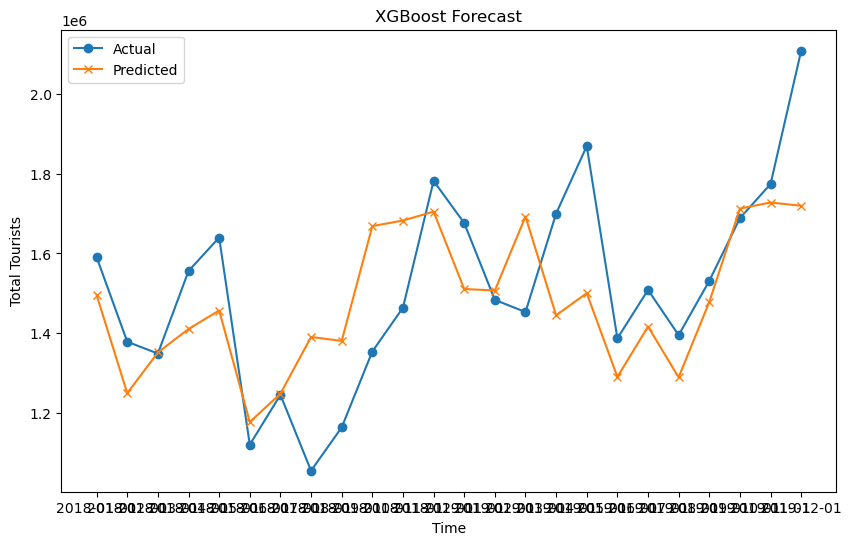

In [62]:
# Increase the plot size (e.g., width=12 inches, height=6 inches)
plt.figure(figsize=(10, 6))
date_range = pd.date_range(start="2018-01-01", end="2019-12-31", freq="M")
# Plot the actual and predicted values
plt.plot(test_data.index, y_test, label="Actual", marker='o')
plt.plot(test_data.index, predictions, label="Predicted", marker='x')

plt.xlabel("Time")
plt.ylabel("Total Tourists")
plt.legend()
plt.title("XGBoost Forecast")
plt.show()


In [59]:
y_test

Date
2018-01-01    1590463.0
2018-02-01    1378781.0
2018-03-01    1349162.0
2018-04-01    1556044.0
2018-05-01    1639759.0
2018-06-01    1120984.0
2018-07-01    1245862.0
2018-08-01    1055698.0
2018-09-01    1164214.0
2018-10-01    1354291.0
2018-11-01    1464076.0
2018-12-01    1781733.0
2019-01-01    1676139.0
2019-02-01    1483689.0
2019-03-01    1453109.0
2019-04-01    1699950.0
2019-05-01    1868938.0
2019-06-01    1387171.0
2019-07-01    1508542.0
2019-08-01    1395385.0
2019-09-01    1531279.0
2019-10-01    1688298.0
2019-11-01    1773738.0
2019-12-01    2107766.0
Name: Tourists, dtype: float64

In [60]:
y_act1=y_test[:]
y_pred1=predictions[:]
y_act1 = pd.DataFrame(y_test, columns=["Tourists"])
y_pred1 = pd.DataFrame(predictions, columns=["Tourists"])
y_act1.reset_index(inplace=True, drop=True)
y_pred1.reset_index(inplace=True, drop=True)
y_pred2=y_pred1.iloc[:,0]
y_act2=y_act1.iloc[:,0]
import numpy as np

# Calculate MAE (Mean Absolute Error)
mae = np.mean(np.abs(y_act2 - y_pred2))

# Calculate RMSE (Root Mean Squared Error)
rmse = np.sqrt(np.mean((y_act2 - y_pred2) ** 2))

# Calculate MAPE (Mean Absolute Percentage Error)
mape = np.mean(np.abs((y_act2 - y_pred2) / y_act2)) * 100

print("MAE:", mae)
print("RMSE:", rmse)
print("MAPE:", mape)

MAE: 151340.81770833334
RMSE: 189956.09931402124
MAPE: 10.13348930065857


In [48]:
y_act2

0     1676139.0
1     1483689.0
2     1453109.0
3     1699950.0
4     1868938.0
5     1387171.0
6     1508542.0
7     1395385.0
8     1531279.0
9     1688298.0
10    1773738.0
11    2107766.0
Name: Tourists, dtype: float64

In [49]:
y_pred2

0     1676321.000
1     1470616.125
2     1464171.375
3     1667732.000
4     1739364.500
5     1417572.125
6     1340618.500
7     1251801.250
8     1297749.500
9     1541107.000
10    1619438.250
11    1751282.250
Name: Tourists, dtype: float32